# Fourier Transform in Numpy
>การแปลงความถี่ของภาพจาก Spatial Domain (ตำแหน่งของพิกเซลในภาพ) ไปเป็น Frequency Domain (องค์ประกอบของความถี่) ด้วยไลบรารี่ Numpy


The Fourier Transform decomposes the image into its frequency components.


> **Fourier Transform** ช่วยแปลงและแยกภาพออกเป็นองค์ประกอบของความถี่ที่แตกต่างกัน ซึ่งสามารถเข้าใจได้ดังนี้


* **Low-Frequency Components**: Represent the overall structure and smooth regions of the image.
>**ส่วนประกอบความถี่ต่ำ**แสดงถึงโครงสร้างโดยรวมและบริเวณที่เรียบของภาพ เช่น ความสว่างพื้นฐานหรือพื้นที่สีเรียบ

  * Represent the smooth regions, large color blocks, and overall structure of the image.When we remove the low-frequency components, only the high-frequency components remain, which correspond to the image's contours, edges, and fine details.
 > แสดงบริเวณที่เรียบ (Smooth Regions), บล็อกสีขนาดใหญ่ (Large Color Blocks) และโครงสร้างโดยรวมของภาพ (Overall Structure) ถูกแทนด้วยส่วนประกอบความถี่ต่ำ (Low-Frequency Components) ในภาพ เมื่อเราลบส่วนประกอบความถี่ต่ำออก จะเหลือเพียงส่วนประกอบความถี่สูง (High-Frequency Components) ซึ่งสอดคล้องกับเส้นขอบ (Contours), ขอบภาพ (Edges) และรายละเอียดที่ละเอียดอ่อน (Fine Details) ของภาพ.

- **High-Frequency Components**: Represent the edges, details, and noise in the image.
> **ส่วนประกอบความถี่สูง**แสดงถึงขอบ (Edges) รายละเอียดเล็ก ๆ และ Noise ในภาพ เช่น เส้นขอบหรือจุดที่มีการเปลี่ยนแปลงอย่างรวดเร็วในความเข้มของแสง

* **Zero-Frequency Component (DC Component)**:
 * The element at the top-left corner (0,0) represents the zero-frequency component, also known as the Direct Current.
 * It corresponds to the overall average brightness or energy of the image.
> **ความถี่ศูนย์**:
จุดที่อยู่มุมซ้ายบนของสเปกตรัม (ตำแหน่ง(0,0)) แสดงถึงความถี่ศูนย์
ความถี่นี้แสดงถึงค่าเฉลี่ยของความสว่างหรือพลังงานรวมของภาพ


In [ ]:
# import libraries
# ประกาศไลบรารี่ที่จะนำเข้ามาใช้
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Fourier Transform Example 1 (การแปลงภาพจาก ตัวอย่างที่ 1)

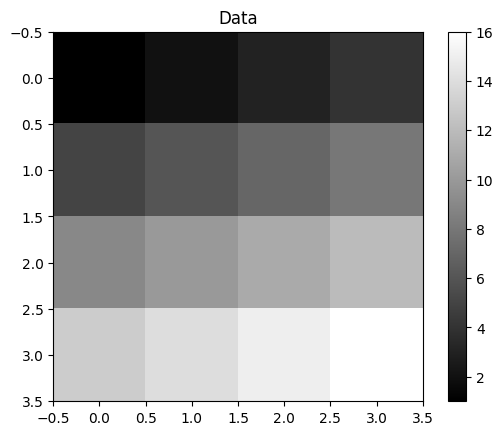

In [ ]:
# Create a simple 4x4 matrix image data
# ประกาศภาพเมทริกซ์ขาวดำขนาด 4 x 4
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12],
                 [13, 14, 15, 16]])

# Show demo data
# แสดงข้อมูลภาพเมทริกซ์ Spatial Domain (2D Array) "ตำแหน่งและค่าความเข้ม" ซึ่งแต่ละพิกเซลแสดงค่าความเข้มของแสงหรือสี
plt.imshow(data, cmap='gray')
plt.title('Data')
plt.colorbar()
plt.show()


**Step 1 : Compute the Fourier Transform**

> **ขั้นตอนที่ 1 : เริ่มขั้นตอนการแปลงข้อมูลจาก Spatial Domain เป็น Frequency Domain โดยใช้สมการของ Fourier Transform**

* *The fft module* = provides the implementation of the Fast Fourier Transform and its related operations.
> *โมดูล fft* นี้ประกอบไปด้วยการเรียกใช้งาน Fast Fourier Transform (FFT) และการดำเนินการอื่น ๆ ที่เกี่ยวข้อง.

* *fft2()* = is used to compute the 2D Discrete Fourier Transform
> *fft2()* = ใช้สำหรับคำนวณ 2D Discrete Fourier Transform (DFT)

In [ ]:
# 1. Call Fourier transform module to calculate 2D Discrete Fourier Transform
# 1. เรียกใช้โมดูล Fourier transform เพื่อเรียกใช้ฟังก์ชัน 2D Discrete Fourier Transform ในการคำนวณ
f = np.fft.fft2(data)

# Output/frequency spectrum without shift (including real and imaginary part)
# แสดงผลลัพธ์ความถี่ของสเปคตรัม (ประกอบด้วย 2 ส่วนคือส่วนจริงกับส่วนจินตภาพ)
print("Without fftshift (Original FFT result):")
print(f)

Without fftshift (Original FFT result):
[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]


In [ ]:
# Show only "Real value"
# แสดงเฉพาะค่าที่เป็นส่วนจริง
print(np.abs(f))

[[136.         11.3137085   8.         11.3137085]
 [ 45.254834    0.          0.          0.       ]
 [ 32.          0.          0.          0.       ]
 [ 45.254834    0.          0.          0.       ]]


**Step 2 : Shift the transformed frequency spectrum. Use fftshift to move the zero frequency component to the center.**
>**ขั้นตอนที่ 2 : เลื่อนสเปกตรัมความถี่ที่ถูกแปลง (Frequency Domain): โดยใช้ fftshift เพื่อย้ายส่วนความถี่ศูนย์ (Zero Frequency Component) ไปยังตำแหน่งกึ่งกลาง.**

In [ ]:
fshift = np.fft.fftshift(f)
print("\nWith fftshift (Shifted FFT result):")
print(fshift)


With fftshift (Shifted FFT result):
[[  0. +0.j   0. +0.j -32. +0.j   0. +0.j]
 [  0. +0.j   0. +0.j -32.-32.j   0. +0.j]
 [ -8. +0.j  -8. -8.j 136. +0.j  -8. +8.j]
 [  0. +0.j   0. +0.j -32.+32.j   0. +0.j]]


In [ ]:
# Show only "Real value"
# แสดงเฉพาะค่าที่เป็นส่วนจริง
print(np.abs(fshift))

[[  0.          0.         32.          0.       ]
 [  0.          0.         45.254834    0.       ]
 [  8.         11.3137085 136.         11.3137085]
 [  0.          0.         45.254834    0.       ]]


**Step 3 : Calculate the magnitude spectrum.**
>**ขั้นตอนที่ 3 : การคำนวณหาค่าเปคตรัมของ magnitude (amplitude ของแต่ละความถี่)**

**The magnitude spectrum** helps us analyze the image from the perspective of the frequency domain. It reveals the distribution of smooth regions (low frequency) and edges/details (high frequency) in the image.
>**Magnitude Spectrum** ช่วยให้เราวิเคราะห์ภาพในมุมมองของโดเมนความถี่ (Frequency Domain) โดยแสดงการกระจายของบริเวณที่เรียบ (ความถี่ต่ำ) และบริเวณที่มีขอบหรือรายละเอียด (ความถี่สูง) ในภาพ.

[[ 0.          0.         69.93015123  0.        ]
 [ 0.          0.         76.68331955  0.        ]
 [43.94449155 50.21426308 98.39961852 50.21426308]
 [ 0.          0.         76.68331955  0.        ]]


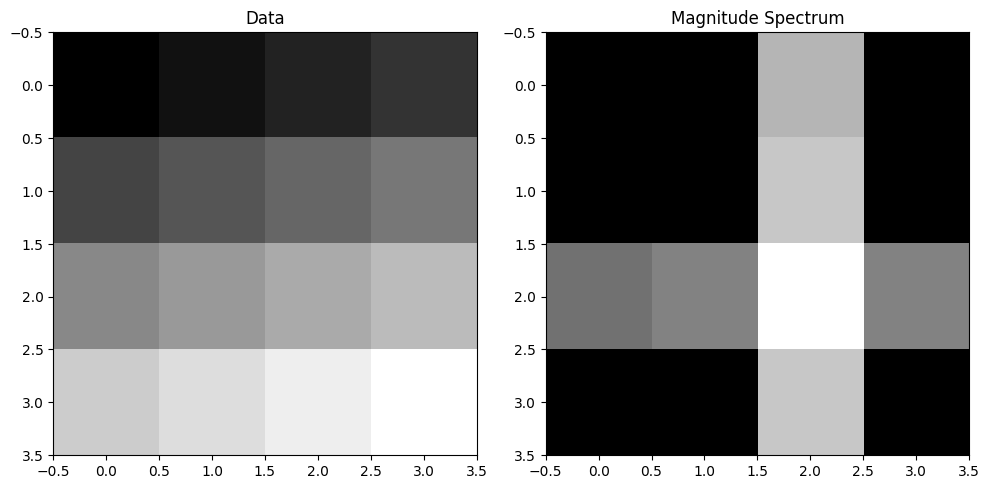

In [ ]:
# Mathematical definition of magnitude: The magnitude of a complex number is its length in the complex plane， Convert to visualized intensity values
# ในทางคณิตศาสตร์ ได้ให้นิยามของ magnitude ว่าเป็นขนาดของจำนวนเชิงซ้อน (Magnitude) คือความยาวของมันในระนาบเชิงซ้อน (Complex Plane) ซึ่งสามารถแปลงเป็นค่าความเข้ม (Intensity) ที่มองเห็นได้.
magnitude_spectrum = 20*np.log(np.abs(fshift)+1)  # Add 1 to avoid log(0)
print(magnitude_spectrum)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2,1)
plt.imshow(data, cmap='gray')
plt.title('Data')

plt.subplot(1, 2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

plt.tight_layout()
plt.show()

**Step 4 : Create mask and use high pass filter.**
>**ขั้นตอนที่ 4 : การเลือกสนใจเฉพาะส่วนที่มีค่าความถี่ที่สูง**

Data shape = 
(4, 4)
Mask = 
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
Center coordinates = 
2
2
Mask for HPF
[[1 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 1]]
Center coordinates: crow=2, ccol=2
Row range: -58 to 63
Column range: -58 to 63


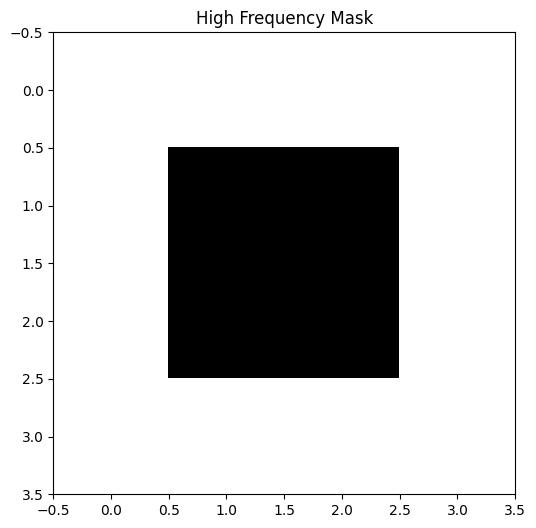

In [ ]:
# 1. Create a 256x256 zero matrix (mask)
# 1. สร้างมากส์ขนาด 256x256 กำหนดค่าให้เป็น 0 ทั้งเมทริกซ์
rows, cols = data.shape # Image dimensions
print("Data shape = ")
print(data.shape)

mask = np.ones((rows, cols), np.uint8)  # Initialize a zero matrix
print("Mask = ")
print(mask)

# 2. Define the center coordinates
# 2. หาคู่อันดับกึ่งกลาง
crow, ccol = rows // 2, cols // 2  # Center coordinates //(floor division)
print("Center coordinates = ")
print(crow)
print(ccol)

# 3. Set the center region to 0
# 3. กำหนดค่าให้จุดกึ่งกลาง
mask[crow-1:crow+1, ccol-1:ccol+1] = 0  # Define a square region
print("Mask for HPF")
print(mask)

# 4. Print the coordinate range
# 4. แสดงค่าช่วงของจุดกึ่งกลาง
print(f"Center coordinates: crow={crow}, ccol={ccol}")
print(f"Row range: {crow-60} to {crow+61}")
print(f"Column range: {ccol-60} to {ccol+61}")

# 5. Visualize the result
# 5. แสดงภาพมากส์ที่เราจะนำไปใช้ในขั้นตอนต่อไป
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')  # Display the mask
plt.title('High Frequency Mask')
plt.axis('on')  # Show axes
plt.show()


In [ ]:
# Define the image dimensions
# กำหนดขนาดของภาพ
rows, cols = data.shape

# Define the center of the image
# กำหนดตำแหน่งจุดศูนย์กลางของภาพ
crow, ccol = rows//2, cols//2

# Remove the low-frequency components by setting the center region to zero
# ลบส่วนประกอบความถี่ต่ำโดยตั้งค่าบริเวณศูนย์กลางเป็นศูนย์
fshift[crow-1:crow+1, ccol-1:ccol+1] = 0

**Step 5 : Perform the Inverse Fourier Transform for transform frequency version back to original image type(pixel).**
>**ขั้นตอนที่ 5 : การทำ Inverse Fourier Transform เพื่อแปลงภาพในรูปแบบสัญาณความถี่กลับไปเป็นรูปแบบภาพดั้งเดิม(พิกเซล)**

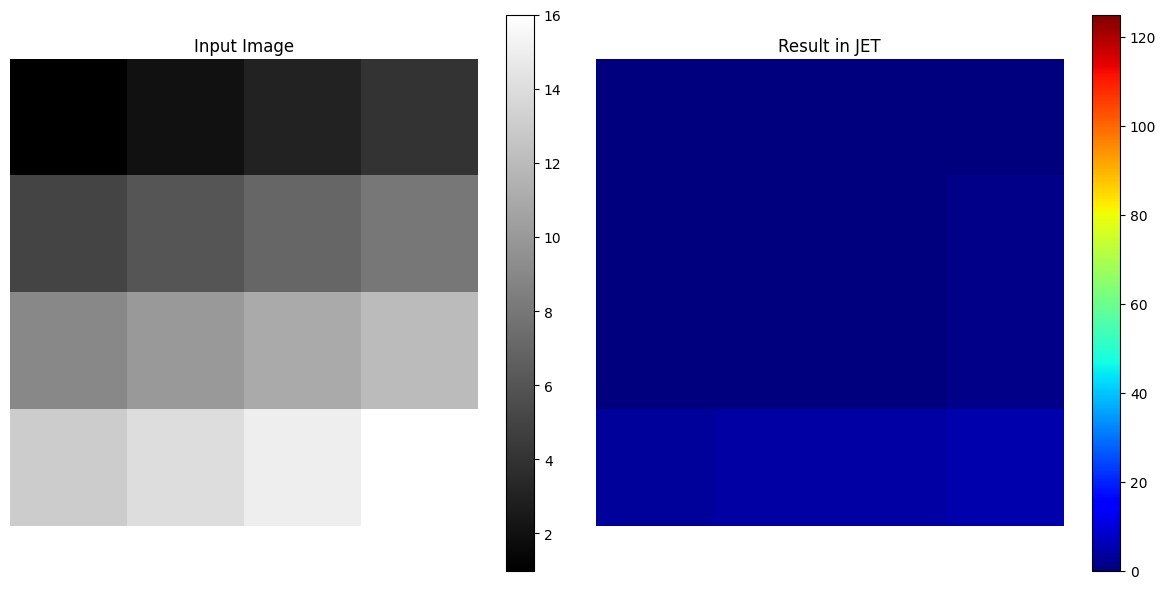

In [ ]:
# ขั้นตอนการแปลง
# 1. Move the zero-frequency components back to the top-left corner
# 1. ย้ายส่วนประกอบความถี่ศูนย์กลับไปที่มุมบนซ้าย
f_ishift = np.fft.ifftshift(fshift)

# 2. Perform the Inverse Fourier Transform
# 2. ทำ Inverse Fourier Transform
img_back = np.fft.ifft2(f_ishift)

# 3. Take the real part of the result to ensure the image is real-valued
# 3. ใช้ส่วนจริง (Real Part) ของผลลัพธ์เพื่อให้ภาพที่ได้มีค่าเป็นจริง (Real-Valued)
img_back = np.real(img_back)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Input Image')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 2, 2)
#plt.imshow(img_back, cmap='jet')
plt.imshow(img_back, cmap='jet', vmin=0, vmax=125)
plt.colorbar()
plt.title('Result in JET')
plt.axis('off')

plt.tight_layout()
plt.show()

## Fourier transform Example 2

In [ ]:
# Download image
# ดาวน์โหลดข้อมูลภาพ
!gdown '1-9wfY_d0eMaGImZ3f8dbLp-fx8BWuc1w'

Downloading...
From: https://drive.google.com/uc?id=1-9wfY_d0eMaGImZ3f8dbLp-fx8BWuc1w
To: /content/messi5.jpg
100% 20.5k/20.5k [00:00<00:00, 30.4MB/s]


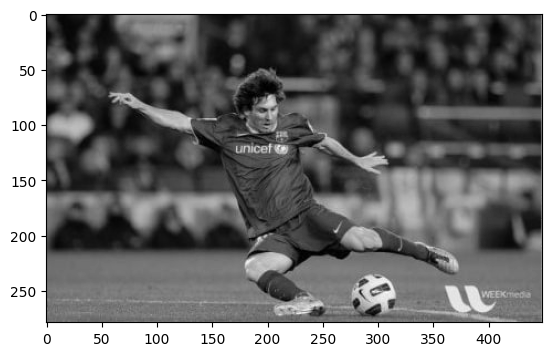

In [ ]:
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Step 1. Fourier transform
f = np.fft.fft2(img)# # Compute the 2D Fourier Transform of the image

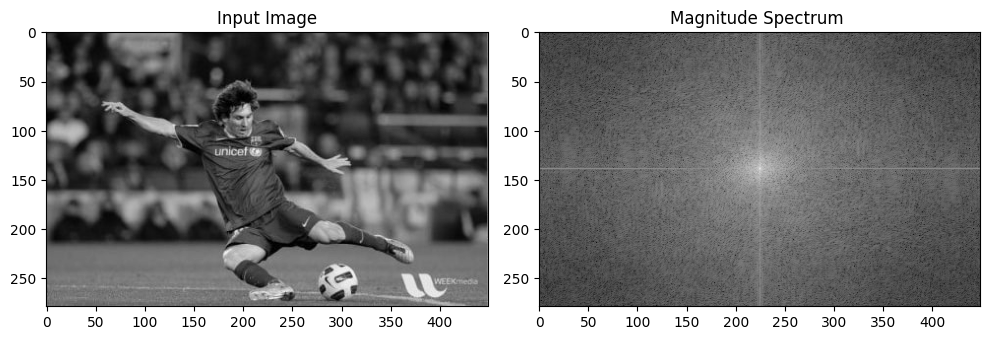

In [ ]:
# Step 2. Shift the transformed frequency spectrum
fshift = np.fft.fftshift(f)

# Step 3. Calculate the magnitude
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum ")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.tight_layout()
plt.show()

### High pass filter (Messi image)

Center coordinates: crow=139, ccol=224
Row range: 79 to 200
Column range: 164 to 285


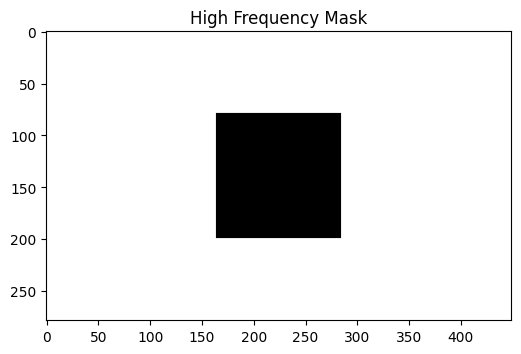

In [ ]:
# Example of the mask
# ตัวอย่างการสร้างหน้ากาก (Mask)

# 1. Create a 256x256 zero matrix (mask)
# 1. สร้างเมทริกซ์ขนาด 256x256 ที่มีค่าเริ่มต้นเป็นศูนย์ (mask)
rows, cols = img.shape # Image dimensions
mask = np.ones((rows, cols), np.uint8)  # Initialize a zero matrix # กำหนดเมทริกซ์เริ่มต้น

# 2. Define the center coordinates
# 2. กำหนดตำแหน่งจุดศูนย์กลางของภาพ
crow, ccol = rows // 2, cols // 2  # Center coordinates # พิกัดจุดศูนย์กลาง

# 3. Set the center region to 0
# 3. ตั้งค่าบริเวณศูนย์กลางเป็น 0
mask[crow-60:crow+61, ccol-60:ccol+61] = 0  # Define a square region # กำหนดบริเวณสี่เหลี่ยม

# 4. Print the coordinate range
# 4. แสดงช่วงของพิกัดที่กำหนด
print(f"Center coordinates: crow={crow}, ccol={ccol}")
print(f"Row range: {crow-60} to {crow+61}")
print(f"Column range: {ccol-60} to {ccol+61}")

# 5. Visualize the result
# 5. แสดงผลหน้ากากที่สร้างขึ้น
plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')  # Display the mask
plt.title('High Frequency Mask')
plt.axis('on')  # Show axes
plt.show()


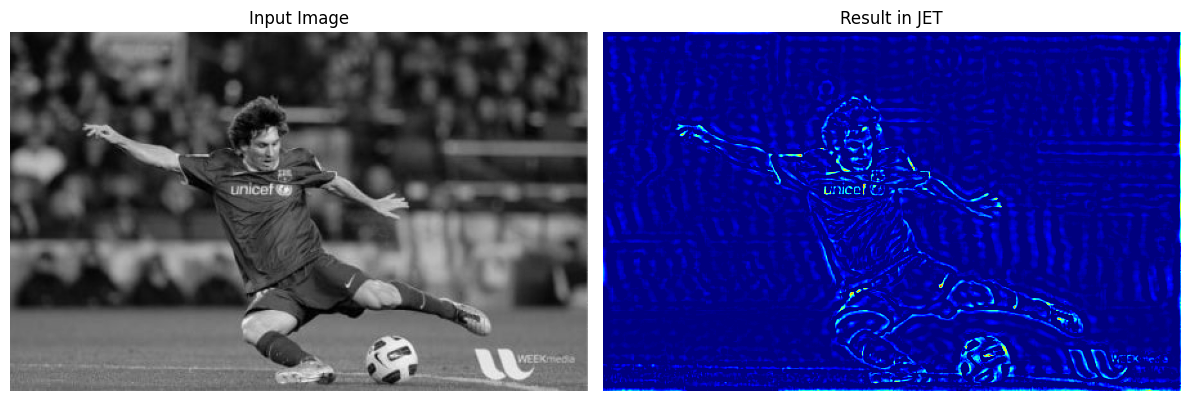

In [ ]:
# Define the image mask dimensions rectangular window of size 60x60
# กำหนดขนาด mask ของภาพ ขนาดหน้าต่างสี่เหลี่ยม 60x60
rows, cols = img.shape
crow, ccol = rows//2, cols//2 # Define the center of the image
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0 # Remove the low-frequency components by setting the center region to zero

# 1. Move the zero-frequency components back to the top-left corner
# 1. ย้ายส่วนประกอบความถี่ศูนย์กลับไปที่มุมบนซ้าย
f_ishift = np.fft.ifftshift(fshift)

# 2. Perform the Inverse Fourier Transform
# 2. คำนวณ Inverse Fourier Transform
img_back = np.fft.ifft2(f_ishift)

# 3. Take the real part of the result to ensure the image is real-valued
# 3. ใช้ส่วนจริง (Real Part) ของผลลัพธ์เพื่อให้แน่ใจว่าภาพที่ได้เป็นค่าจริง (Real-Valued)
img_back = np.real(img_back)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
# plt.imshow(img_back, cmap='jet')
plt.imshow(img_back, cmap='jet', vmin=0, vmax=125)
plt.title('Result in JET')
plt.axis('off')

plt.tight_layout()
plt.show()

- Low-Frequency Components: Represent the smooth regions, large color blocks, and overall structure of the image.
- When we remove the low-frequency components, only the high-frequency components remain, which correspond to the image's contours, edges, and fine details.

In [ ]:
print("Min value:", np.min(img_back))
print("Max value:", np.max(img_back))


Min value: -159.31478808763134
Max value: 128.7527188988459


# Fourier Transform in OpenCV
>การแปลงความถี่ของภาพจาก Spatial Domain (ตำแหน่งของพิกเซลในภาพ) ไปเป็น Frequency Domain (องค์ประกอบของความถี่) ด้วยไลบรารี่ OpenCV

**Explain cv.dft() function (อธิบายการใช้งานฟังก์ชัน cv.dft())**

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
* **np.float32(img)** = DFT operates on floating-point data, so integer-type images (e.g., 8-bit images) need to be converted.
> np.float32(img) = การทำงานของ DFT ต้องใช้ข้อมูลแบบเลขทศนิยม (Floating-Point) ดังนั้นภาพที่มีประเภทข้อมูลเป็นจำนวนเต็ม (เช่น ภาพ 8 บิต) จะต้องถูกแปลงก่อน.
* **flags=cv.DFT_COMPLEX_OUTPUT** =  result is in complex number form.(stored 2 channel arrays)
 * Channel 0: Real part of the DFT.
 * Channel 1: Imaginary part of the DFT.
 > flags=cv.DFT_COMPLEX_OUTPUT = ผลลัพธ์จะอยู่ในรูปแบบตัวเลขเชิงซ้อน (Complex Number) ซึ่งถูกเก็บในรูปแบบอาร์เรย์ 2 ช่อง (2 Channel Arrays)
 > * Channel 0: ส่วนจริง (Real Part) ของ DFT.
 > * Channel 1: ส่วนจินตภาพ (Imaginary Part) ของ DFT.

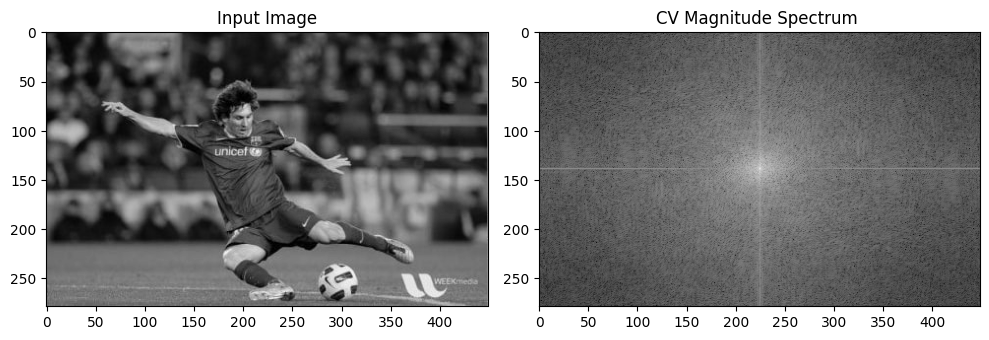

In [ ]:
# 1。 Read the grayscale image
# 1. อ่านภาพในโหมดสีเทา (Grayscale)

# 2. Compute the Discrete Fourier Transform
# 2. คำนวณ Discrete Fourier Transform (DFT)
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)

# 3. Shift the zero-frequency component to the center
# 3. เลื่อนส่วนประกอบความถี่ศูนย์ (Zero-Frequency Component) ไปยังตำแหน่งตรงกลาง
dft_shift = np.fft.fftshift(dft)

# 4. # Compute the magnitude spectrum
# 4. คำนวณ Magnitude Spectrum
cv_magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# แสดงผลภาพ
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("CV Magnitude Spectrum ")
plt.imshow(cv_magnitude_spectrum, cmap='gray')

plt.tight_layout()
plt.show()

### Low Pass Filter

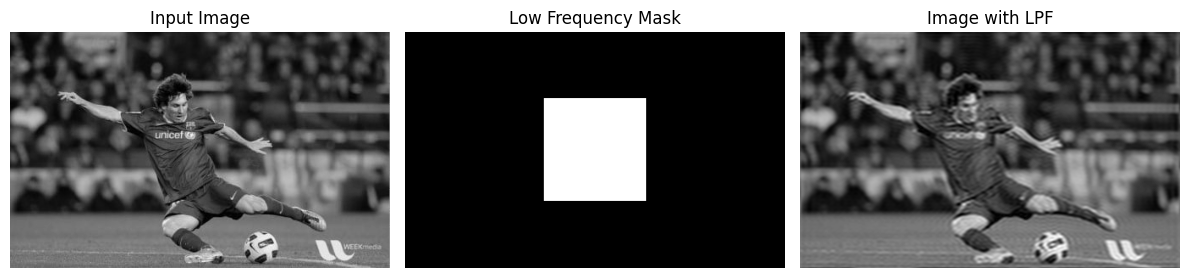

In [ ]:
#Define mask size
# กำหนดขนาดมากส์ของภาพ
rows, cols = img.shape # Get the dimensions of the image (จำนวนแถวและคอลัมน์)

# Define the center coordinates
# กำหนดพิกัดจุดศูนย์กลางของภาพ
crow, ccol = rows // 2, cols // 2

# Create a two-channel mask matching dft_shift
# สร้างหน้ากากสองช่องสัญญาณ (Two-Channel Mask) ที่มีขนาดเท่ากับ dft_shift
mask = np.zeros((rows, cols, 2), np.uint8)

# Specific only center area (low frequency)
# เก็บเฉพาะบริเวณศูนย์กลาง (ความถี่ต่ำ)
mask[crow-60:crow+61, ccol-60:ccol+61] = 1   # Retain the central low-frequency region # กำหนดบริเวณศูนย์กลางให้เป็น 1

# Apply the mask to retain low-frequency components
# ใช้หน้ากากเพื่อเก็บเฉพาะความถี่ต่ำ
fshift_lowpass = dft_shift * mask

# Perform the inverse Fourier Transform
# คำนวณ Inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift_lowpass)  # Shift the zero-frequency components back to the top-left corner # ย้ายส่วนประกอบความถี่ศูนย์กลับไปยังมุมบนซ้าย

# Inverse DFT
# ทำ Inverse Discrete Fourier Transform (IDFT)
img_back = cv.idft(f_ishift)

# Calculate the magnitude, keeping only the real part
# คำนวณ Magnitude เพื่อเก็บเฉพาะส่วนจริง (Real Part)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask[:, :, 0], cmap='gray')
plt.title('Low Frequency Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Image with LPF')
plt.axis('off')

plt.tight_layout()
plt.show()


# BAND PASS FILTER

- Allows components within a specific frequency range to pass through.
- Suppresses low frequencies below this range and high frequencies above this range.
>* อนุญาตให้ส่วนประกอบภายในช่วงความถี่ที่กำหนดสามารถผ่านได้
>* ปรับลดความถี่ต่ำที่อยู่ต่ำกว่าช่วงนี้ และความถี่สูงที่อยู่เหนือช่วงนี้

1. Outer Ring Radius:
Set as the high-frequency cutoff value.
High-frequency components outside this ring are removed.
> รัศมีวงนอก (Outer Ring Radius):
กำหนดเป็นค่าความถี่สูงที่ต้องการตัดออก
ส่วนประกอบความถี่สูงที่อยู่นอกวงนี้จะถูกลบออก

2. Inner Ring Radius:
Set as the low-frequency cutoff value.Low-frequency components inside this ring are removed.
> รัศมีวงใน (Inner Ring Radius):
กำหนดเป็นค่าความถี่ต่ำที่ต้องการตัดออก
ส่วนประกอบความถี่ต่ำที่อยู่ภายในวงนี้จะถูกลบออก

3. Ring-Shaped Region:
The region between the inner ring and the outer ring is retained.
> บริเวณรูปวงแหวน (Ring-Shaped Region):
บริเวณระหว่างวงในและวงนอกจะถูกเก็บไว้.

1. Calculate the Euclidean distance from each point to the center:
> คำนวณระยะทางแบบยูคลิด (Euclidean Distance) จากแต่ละจุดถึงจุดศูนย์กลาง:

$$
\text{distance} = \sqrt{(i - \text{center row})^2 + (j - \text{center col})^2}
$$


- i and j: Current point coordinates.
- crow and ccol: Center coordinates.
>* i และ j: พิกัดของจุดปัจจุบันในเมทริกซ์.
>* crow และ ccol: พิกัดของจุดศูนย์กลาง.

2. Determine whether the distance lies within the annular region:
> ตรวจสอบว่าระยะทางอยู่ในบริเวณวงแหวน (Annular Region) หรือไม่:
- r_in < distance < r_out:
    - If the distance lies between the inner radius r in​  and outer radius r out​ , set mask[𝑖,𝑗]=1 indicating these frequency components will be preserved.

    - Values at other positions remain 0, indicating these frequency components will be filtered out.
> * ถ้า 𝑟 in < distance < 𝑟 out :
>  * ถ้าระยะทางอยู่ระหว่างรัศมีวงใน (r in) และรัศมีวงนอก (r out) , ให้ตั้งค่า mask[i,j] = 1 เพื่อระบุว่าความถี่ในจุดนั้นจะถูกเก็บไว้.
> * ตำแหน่งอื่นที่อยู่นอกช่วงนี้จะมีค่าเป็น 0
0 ซึ่งหมายถึงความถี่ในจุดเหล่านั้นจะถูกกรองออก.

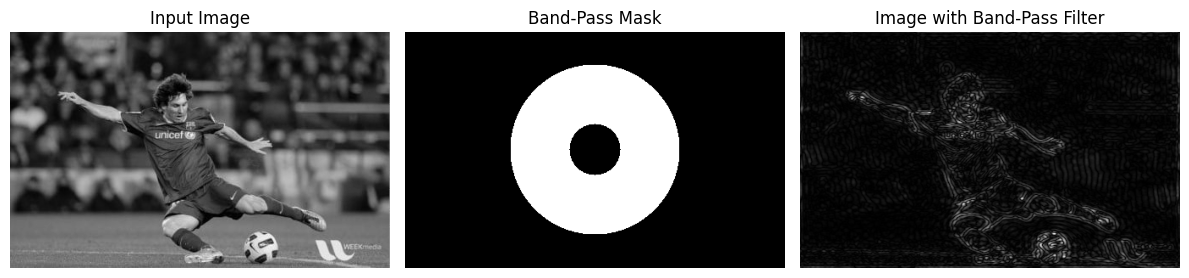

In [ ]:
# Create a Band-Pass Mask
# สร้างหน้ากาก Band-Pass

# In the frequency domain, the band-pass filter is implemented by constructing a ring-shaped mask.
# ใน Frequency Domain, Band-Pass Filter ถูกสร้างขึ้นโดยหน้ากากรูปวงแหวน

# It retains the intermediate frequency components while removing low frequencies (center region) # and high frequencies (outer regions).
# ซึ่งเก็บเฉพาะส่วนประกอบความถี่ระดับกลาง (Intermediate Frequency) โดยกรองความถี่ต่ำ (บริเวณศูนย์กลาง)
# และความถี่สูง (บริเวณด้านนอก)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Create a two-channel mask matching the image size
# สร้างหน้ากากสองช่องสัญญาณที่ขนาดเท่าภาพ
mask = np.zeros((rows, cols, 2), np.uint8)

# Define the band-pass region
# กำหนดบริเวณ Band-Pass
r_out = 100  # Outer radius
r_in = 30   # Inner radius

# Looping for create mask
# วนลูปสร้างหน้ากาก
for i in range(rows):
    for j in range(cols):
        distance = np.sqrt((i - crow)**2 + (j - ccol)**2) #calculate Euclidean Distance #คำนวณระยะทางยูคลิด
        if r_in < distance < r_out: #Check distance in range # เช็คว่าระยะทางอยู่ในช่วงที่กำหนด
            mask[i, j] = 1 #keep frequency in this area #เก็บส่วนประกอบความถี่ที่อยู่ในบริเวณนี้

# Apply the Mask
# นำมากส์ไปใช้
fshift_bandpass = dft_shift * mask # Element-wise multiplication with the frequency domain data # คูณข้อมูลใน Frequency Domain กับหน้ากากแบบจุดต่อจุด

# Step switch to original image type(pixel) or spatial domain
# ขั้นตอนการแปลงกลับเป็นชนิดภาพ(pixel) หรือ Spatial Domain
f_ishift = np.fft.ifftshift(fshift_bandpass) # Shift the zero-frequency components back to the top-left corner # เลื่อนส่วนความถี่ศูนย์กลับไปยังมุมบนซ้าย
img_back = cv.idft(f_ishift) # Inverse Discrete Fourier Transform # ทำ Inverse Discrete Fourier Transform (IDFT)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1]) # Calculate the magnitude # คำนวณ Magnitude

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask[:, :, 0], cmap='gray')
plt.title('Band-Pass Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Image with Band-Pass Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


- Low Frequencies Removed
- High Frequencies Removed
- Mid Frequencies Retained: Useful details like texture, outlines, and patterns are visible in the result.